In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc
from scipy.stats import norm

In [24]:
def gaussianInverseCDF (p):

    a1 = -39.69683028665376
    a2 = 220.9460984245205
    a3 = -275.9285104469687
    a4 = 138.3577518672690
    a5 =-30.66479806614716
    a6 = 2.506628277459239

    b1 = -54.47609879822406
    b2 = 161.5858368580409
    b3 = -155.6989798598866
    b4 = 66.80131188771972
    b5 = -13.28068155288572

    c1 = -0.007784894002430293
    c2 = -0.3223964580411365
    c3 = -2.400758277161838
    c4 = -2.549732539343734
    c5 = 4.374664141464968
    c6 = 2.938163982698783

    d1 = 0.007784695709041462
    d2 = 0.3224671290700398
    d3 = 2.445134137142996
    d4 = 3.754408661907416

    # Define break-points.
    p_low =  0.02425
    p_high = 1 - p_low
    x = 0.0

    # Rational approximation for lower region.
    if 0 < p and p < p_low:
        q = np.sqrt(-2*np.log(p))
        x = (((((c1*q+c2)*q+c3)*q+c4)*q+c5)*q+c6) / ((((d1*q+d2)*q+d3)*q+d4)*q+1)

    # Rational approximation for central region.
    if p_low <= p and p <= p_high:
        q = p - 0.5
        r = q*q
        x = (((((a1*r+a2)*r+a3)*r+a4)*r+a5)*r+a6)*q / (((((b1*r+b2)*r+b3)*r+b4)*r+b5)*r+1)

    # Rational approximation for upper region.
    if p_high < p and p < 1:
        q = np.sqrt(-2*np.log(1-p))
        x = -(((((c1*q+c2)*q+c3)*q+c4)*q+c5)*q+c6) / ((((d1*q+d2)*q+d3)*q+d4)*q+1)

    # Pseudo-code algorithm for refinement
    if (0 < p) and (p < 1):
        e = 0.5 * erfc(-x/np.sqrt(2)) - p
        u = e * np.sqrt(2*np.pi) * np.exp(x*x/2)
        x = x - u/(1 + x*u/2)

    return x

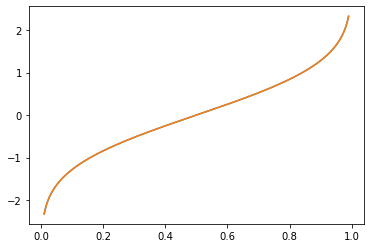

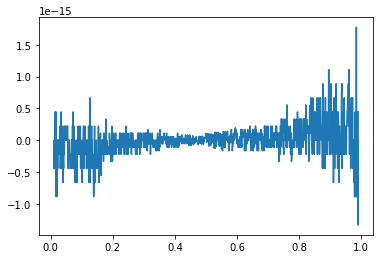

In [36]:
x = np.linspace(0.01,0.99,1024)
y = list(map(gaussianInverseCDF,x))

plt.plot(x,y)
plt.plot(x,norm.ppf(x))
plt.show()
plt.close()

plt.plot(x,y - norm.ppf(x))
plt.show()
plt.close()